In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [8]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3)  #26 26
        self.pool1 = nn.MaxPool2d(kernel_size=2)  # 13 13

        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)  #11 11
        # self.pool2 = nn.AdaptiveAvgPool2d(output_size=(3, 3))
        self.pool2 = nn.MaxPool2d(kernel_size=3)

        self.fc3 = nn.Linear(16 * 3 * 3, 10)

    def forward(self, x):
        # Flatten the input image from 28x28 to a 784-element vector
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        x = x.view(-1, 16 * 3 * 3)
        x = self.fc3(x)
        # Apply log softmax for the final output (often used with NLLLoss, which is part of CrossEntropyLoss)
        return F.log_softmax(x, dim=1)

In [9]:
SimpleNN

__main__.SimpleNN

In [10]:
model = SimpleNN().to("cpu")

In [11]:
model

SimpleNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (fc3): Linear(in_features=144, out_features=10, bias=True)
)

In [12]:
torch.load("mnist_simple_nn.pth",
           map_location=torch.device("cpu"),
           weights_only=True,
           )

OrderedDict([('conv1.weight',
              tensor([[[[-0.4814, -0.6990, -0.7116],
                        [ 0.4219,  0.0650, -0.0044],
                        [ 0.5095,  0.2138,  0.7075]]],
              
              
                      [[[-0.2946,  0.3478,  0.4269],
                        [-0.2358, -0.0920,  0.4480],
                        [-0.0642, -0.5702,  0.1428]]],
              
              
                      [[[-0.5580, -0.1553,  0.1899],
                        [-0.3164, -0.4126, -0.4613],
                        [-0.4651, -0.1684, -0.6459]]],
              
              
                      [[[-0.1388, -0.6455,  0.0852],
                        [ 0.4127, -0.3864, -0.5679],
                        [ 0.5861,  0.2225, -0.3083]]],
              
              
                      [[[ 0.1478, -0.0027,  0.4175],
                        [-0.1326,  0.1175,  0.3983],
                        [-0.5018, -0.1197,  0.2888]]],
              
              
               

In [13]:
model.load_state_dict(torch.load("mnist_simple_nn.pth",
                                 map_location=torch.device("cpu"),
                                 weights_only=True,
                                 ))

<All keys matched successfully>

tensor([[-10.7174, -11.8303,  -6.8734,  -3.7708, -11.8616,  -0.0275,  -9.0271,
          -7.4628,  -6.2022,  -8.2392]])
tensor(-0.0275)


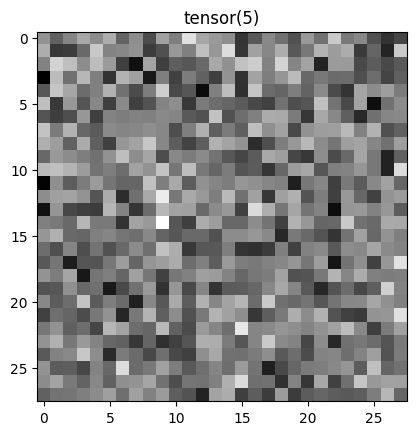

In [18]:
from matplotlib import pyplot as plt

with torch.no_grad():
    x = torch.randn(size=(1, 28,28))
    y = model(x)
    print(y)
    print(y.max())
    plt.imshow(x[0,::], cmap="gray")
    plt.title(y.argmax())
    plt.show()
